<a href="https://colab.research.google.com/github/qubitskz/public-datasets-workings/blob/master/Newsgroups_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

news_train = fetch_20newsgroups(subset='train')
news_test = fetch_20newsgroups(subset='test')


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    'Was this documented in the beginning?',
    'I began documenting this article',
    'I fisrt wrote singal dokument'
]

vectorizer = CountVectorizer()
vectorizer.fit(corpus)

print vectorizer.get_feature_names()
print 'Number of words in the vocabulary: ', len(vectorizer.get_feature_names())

test_corpus = [
    'Matrimony.com is doing a good job for the society',
    'Third document is not the second document if the first document is not the second one'
]

X_train = vectorizer.transform(test_corpus)

#print X_train
print X_train.toarray() #Note, the unknown words are ignored!

[u'and', u'article', u'began', u'beginning', u'document', u'documented', u'documenting', u'dokument', u'first', u'fisrt', u'in', u'is', u'one', u'second', u'singal', u'the', u'third', u'this', u'was', u'wrote']
Number of words in the vocabulary:  20
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 3 0 0 0 1 0 0 2 1 2 0 3 1 0 0 0]]


In [0]:
import re

sent = 'This is the first document. He said, "what happend to my profile????"'
pattern=r'[\W?,".\']+'
print re.split(pattern,sent) #Tokenizer. 


['This', 'is', 'the', 'first', 'document', 'He', 'said', 'what', 'happend', 'to', 'my', 'profile', '']


In [0]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vocab = set()
for sent in corpus:
    tokens = re.split(pattern,sent)# Sentence to tokens
    tokens_lower = [w.lower() for w in tokens] #List comprehension
    tokens_lower_1 = [w.lower() for w in tokens if w.strip() != ''] #List comprehension
    vocab.update(tokens_lower_1)

vocab = sorted(list(vocab))
print vocab, len(vocab)

#Make a vector given the vocab
test_corpus = [
    'Matrimony.com is doing a good job for the society',
    'Third document is not the second document if the first document is not the second one'
]

all_vectors = []
for new_sent in test_corpus:
    v = [0]*len(vocab) #Code for creating a list of size len(vocab), with 0 as its elements
    tokens = [w.lower() for w in re.split(pattern,new_sent) if w.strip() != ''] #List comprehension
    for t in tokens:
        try:
            idx = vocab.index(t) #Search for t in the list vocab, and return its index
            v[idx] += 1
        except ValueError:
            pass #Do nothing statement in python
    all_vectors.append(v)

print all_vectors 

#18377366611 -> <ID>, "Ramanan" -> PERSON

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this'] 9
[[0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 3, 1, 2, 1, 2, 3, 1, 0]]


In [0]:
train_data = news_train.data
test_data = news_test.data

print news_train.keys()
print train_data[0]
print news_train.target_names[news_train.target[0]]


['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





rec.autos


In [0]:
#Data wrangling experiments

X = np.random.randint(1,100,(20,5))
y = np.random.randint(0,3,X.shape[0])
print 'Data',X
print 'Labels',y

Data [[61 74 21 44 66]
 [ 8 21 93 78 30]
 [29 19 84 50 15]
 [96 52 51 77 62]
 [84 49 74 64 94]
 [71 30 24 10 36]
 [73 50 35 72 25]
 [ 5 26 96 25 31]
 [52 73 76 23 49]
 [60 60 65 80 58]
 [48  9 77 23 69]
 [12 91 54 62  2]
 [24 58 17  1 82]
 [41 45 95 55 78]
 [77 91 70 71 97]
 [ 8 46 19 13 65]
 [ 9 77 63 67 25]
 [35 54 19 34 53]
 [71 60 14 72 83]
 [27 25 14 81 30]]
Labels [2 1 0 0 2 1 2 0 1 2 2 1 0 0 0 1 0 2 2 2]


In [0]:
#Key Idea: Transform the situation into a toy scenario. Experiment
#and then apply to the bigger set

#Select only examples that have class labels 0 and 2
select_idx_list = np.nonzero((y==0) | (y==2))

X_select = X[select_idx_list,:]
y_select = y[select_idx_list]

print X_select
print
print y_select

[[[61 74 21 44 66]
  [29 19 84 50 15]
  [96 52 51 77 62]
  [84 49 74 64 94]
  [73 50 35 72 25]
  [ 5 26 96 25 31]
  [60 60 65 80 58]
  [48  9 77 23 69]
  [24 58 17  1 82]
  [41 45 95 55 78]
  [77 91 70 71 97]
  [ 9 77 63 67 25]
  [35 54 19 34 53]
  [71 60 14 72 83]
  [27 25 14 81 30]]]

[2 0 0 2 2 0 2 2 0 0 0 0 2 2 2]


In [0]:
targets = news_train.target_names
new_target_names = ['alt','comp','misc','rec','sci','soc','talk']
relabel = [0,1,1,1,1,1,2,3,3,3,3,4,4,4,4,5,6,6,6,6]
print len(targets), np.bincount(relabel).sum()
print targets

train_labels = news_train.target.copy()
test_labels = news_test.target.copy()
for orig_label,label in enumerate(relabel):
    selection = np.nonzero(news_train.target == orig_label)
    train_labels[selection] = label
    
    selection = np.nonzero(news_test.target == orig_label)
    test_labels[selection] = label

    
print len(train_labels), len(news_train.target)
print np.unique(train_labels), np.unique(news_train.target)

print len(test_labels), len(news_test.target)
print np.unique(test_labels), np.unique(news_test.target)

20 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
11314 11314
[0 1 2 3 4 5 6] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
7532 7532
[0 1 2 3 4 5 6] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [0]:
vectorizer = CountVectorizer(max_features = 100000)#Limit vocabulary/features to 50000
vectorizer.fit(train_data)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [0]:
X_train = vectorizer.transform(train_data)
y_train = train_labels

X_test = vectorizer.transform(test_data)
y_test = test_labels


In [0]:
print 'Train data shape: ', X_train.shape
print 'Test data shape: ', X_test.shape

Train data shape:  (11314, 50000)
Test data shape:  (7532, 50000)


In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class = 'multinomial', solver='lbfgs',verbose=2, C=0.1,max_iter = 500) #Multiclass classification


model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.1s finished


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=2, warm_start=False)

In [0]:
print "Training Accuracy: ", model.score(X_train,y_train)
print "Testing Accuracy: ", model.score(X_test,y_test)

Training Accuracy:  0.9986742089446703
Testing Accuracy:  0.8720127456186936


In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,min_samples_leaf = 5, n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
print "Training Accuracy: ", rf.score(X_train,y_train)
print "Testing Accuracy: ", rf.score(X_test,y_test)

Training Accuracy:  0.8462082375817571
Testing Accuracy:  0.7449548592671269


In [0]:
#Error Analysis
from sklearn.metrics import confusion_matrix

y_test_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_test_pred)

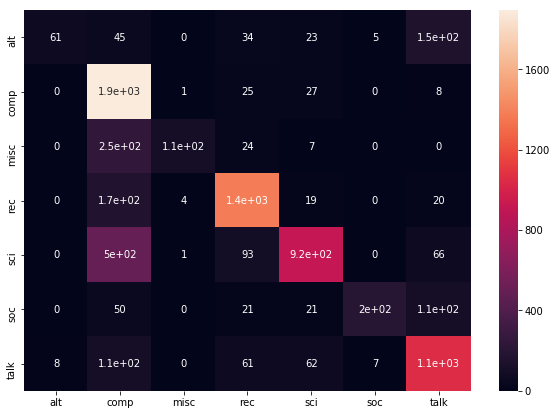

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = new_target_names,
                  columns = new_target_names)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [0]:
#Find examples that truely rec (3) but labelled as comp (1)

examples = np.nonzero((y_test == 3)  & (y_test_pred == 1))
print "Number of misclassification", examples[0].size
print
print

indices = np.random.choice(examples[0],10)

for idx in indices:
    print test_data[idx]
    print
    print '-*-'*10
    print



Number of misclassification 170


From: lws@eembox.ncku.edu.tw (WenHsiang Lin)
Subject: Stats question
Organization: National Cheng Kung University
Lines: 5


	I am just wondering whether the official MLB stats includes 
Intentional Walks in the BB category or not?

WenHsiang Lin


-*--*--*--*--*--*--*--*--*--*-

From: bd@fluent@dartmouth.EDU (Brice Dowaliby)
Subject: Re: Good Reasons to Wave at each other
In-Reply-To: mbeaving@bnr.ca's message of Tue, 20 Apr 1993 18:45:30 GMT
Reply-To: bd%fluent@dartmouth.EDU
Organization: Fluent Inc., Lebanon NH
Distribution: na
Lines: 7

mbeaving@bnr.ca (Michael Beavington) writes:

>The down side is that when I'm in my cage, I have on numerous occasions
>slammed my hand into the rolled up window in an effort to wave at
>a passing biker.  Ow.

Shouldn't this be in the DWI thread?


-*--*--*--*--*--*--*--*--*--*-

From: newman@cps.msu.edu (Timothy S Newman)
Subject: Domestic Content of US/Japan Joint Ventures
Organization: Department of Computer Scie